In [8]:
# import the data
import pandas as pd
import numpy as np
from scipy.stats import t
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy.stats import norm, t
data = pd.read_csv("problem1.csv")

In [9]:
#fit normal distribution
mean = np.mean(data)
variance = np.std(data)
normalized_data = np.random.normal(mean, variance, 500)
normalized_data

#generate the Var and Expected Shortfalls
def VaR_ES(x, alpha=0.05):
    xs = np.sort(x)
    n = int(alpha * len(xs))
    iup = int(np.ceil(n))
    idn = int(np.floor(n))
    VaR = (xs[iup] + xs[idn]) / 2
    ES = np.mean(xs[:idn+1])
    return -VaR, -ES

VaR1 = VaR_ES(normalized_data, alpha=0.05)[0]
ES1 =  VaR_ES(normalized_data, alpha=0.05)[1]
print(VaR1)
print(ES1)

0.08094063271228479
0.09579533219019234


/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [10]:
# Fit the data into T-distribution
def t_log_likelihood(params, data):
    nu, loc, scale = params
    log_likelihood = np.sum(t.logpdf(data, nu, loc, scale))
    return -log_likelihood
def fit_t_distribution(data):
    initial_guess = [3.0, np.mean(data), np.std(data)]  # Initial guess for parameters: degrees of freedom, location, scale
    result = minimize(t_log_likelihood, initial_guess, args=(data), method='Nelder-Mead')
    nu, loc, scale = result.x
    return nu, loc, scale
degrees_of_freedom, location, scale = fit_t_distribution(data)
num_samples = 500
T_data = t.rvs(degrees_of_freedom, loc=location, scale=scale, size=num_samples)

#generate the Var and Expected Shortfalls
def VaR_ES(x, alpha=0.05):
    xs = np.sort(x)
    n = int(alpha * len(xs))
    iup = int(np.ceil(n))
    idn = int(np.floor(n))
    VaR = (xs[iup] + xs[idn]) / 2
    ES = np.mean(xs[:idn+1])
    return -VaR, -ES

VaR2 = VaR_ES(T_data, alpha=0.05)[0]
ES2 =  VaR_ES(T_data, alpha=0.05)[1]
print(VaR2)
print(ES2)

0.07486002145192866
0.11072230968625063


/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minimize.py:496: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x0 = np.asarray(x0)


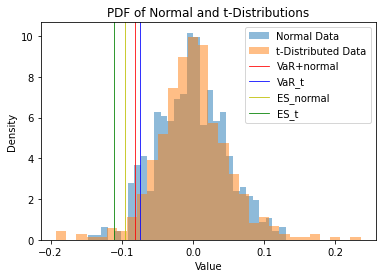

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t

# Generate some example data
normal_data = normalized_data
t_data = T_data

# Create a range of x values for plotting
#x = np.linspace(-5, 5, 400)

# Compute PDF values for the normal distribution
pdf_normal = norm.pdf(x, 0, 1)

# Compute PDF values for the t-distribution (using a df of 5 for this example)
pdf_t = t.pdf(x, 5)

# Plot the PDFs with thinner lines (linewidth=1.0)
#plt.plot(x, pdf_normal, label='Normal Distribution', linewidth=1.0)
#plt.plot(x, pdf_t, label='t-Distribution (df=5)', linewidth=1.0)
plt.hist(normal_data, bins=30, density=True, alpha=0.5, label='Normal Data')
plt.hist(t_data, bins=30, density=True, alpha=0.5, label='t-Distributed Data')

# Add vertical lines with a thinner line (linewidth=0.8)
vertical_lines_x = [-VaR1, -VaR2, -ES1, -ES2]

plt.axvline(x=vertical_lines_x[0], color='r', linewidth=0.8, label=f'VaR+normal')
plt.axvline(x=vertical_lines_x[1], color='b', linewidth=0.8, label=f'VaR_t')
plt.axvline(x=vertical_lines_x[2], color='y', linewidth=0.8, label=f'ES_normal')
plt.axvline(x=vertical_lines_x[3], color='green', linewidth=0.8, label=f'ES_t')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('PDF of Normal and t-Distributions')
plt.legend()
plt.show()
